# MATSUDA ALGORITHM SIMULATIONS
## Example



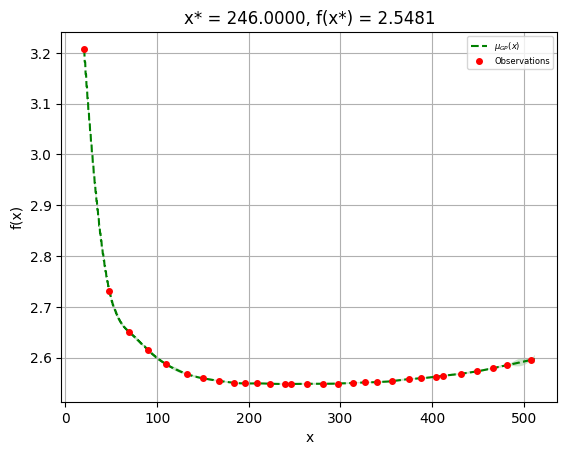

(np.complex128(-0.6696936144204859-1.873543795538255e-17j), np.int64(246))

In [1]:
from source import *


X = 0.0
# 
A_list = [np.array([
    [0.2, 0.0, 0.0, 0.0, 0.3],
    [0.3, -0.2,  X, 0.0, 0.0],
    [0.0,    X, 0.3, 0.2, 0.3],
    [0.0, 0.2, -0.2, 0.3, 0.0],
    [0.2, 0.0, 0.3, 0.2, 0.2]
])]
T = 1024

simulate_matsuda_one_edge_m(brut_test=False, bayesian_test=True, m=100, A_list=A_list, T=T)

In [2]:
num_simulations = 1000
items = range(num_simulations)  # Example list of items to process
# Parallelize the for loop
results = Parallel(n_jobs=-1)(delayed(simulate_matsuda_one_edge_m)(brut_test=False, bayesian_test=False, m=100, A_list=A_list, T=T) for item in tqdm(items, desc="Processing items"))

Processing items: 100%|██████████| 1000/1000 [00:06<00:00, 152.61it/s]


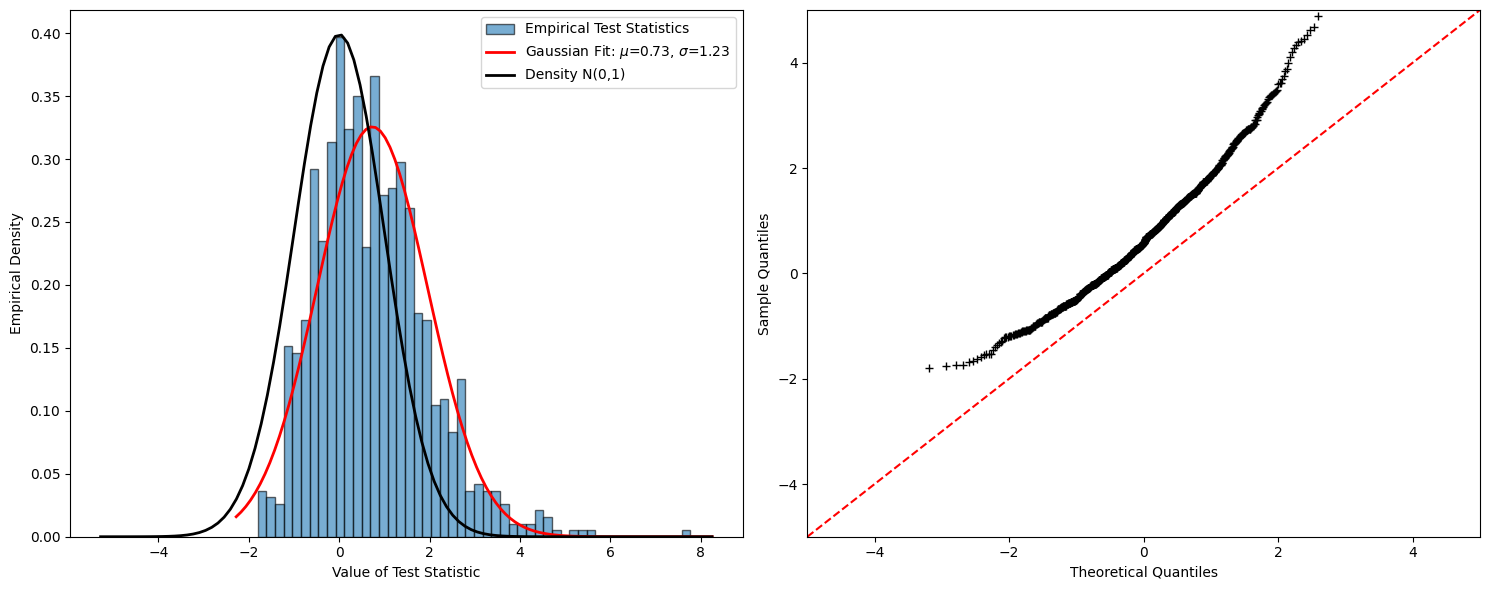

In [3]:
# Separate the list of tuples into individual lists
test_stats, m_values = zip(*results)

# Convert the zipped objects to lists
test_stats = np.real(list(test_stats))
m_values = list(m_values)

plot_test_stats_simulations(test_stats)

# MAXMIN STEPDOWN PROCEDURE
## Example

In [ ]:
m_list = [100, 300, 500]
edge = (1, 2)

T = 1024
alpha = 0.05

delta = 0.02

addition_term = np.array([
    [0.0, 0.0, 0.0, 0.0, 0.0],
    [0.0, 0.0, 1.0, 0.0, 0.0],
    [0.0, 1.0, 0.0, 0.0, 0.0],
    [0.0, 0.0, 0.0, 0.0, 0.0],
    [0.0, 0.0, 0.0, 0.0, 0.0]
])

X = 0.0

initial_A_list = np.array([
    [0.2, 0.0, 0.3, 0.0, 0.3],
    [0.3, -0.2, X, 0.0, 0.0],
    [0.2, X, 0.3, 0.0, 0.0],
    [0.2, 0.2, 0.0, 0.3, 0.0],
    [0.2, 0.5, -0.5, 0.0, 0.2]
])


# Configuration parameters
config = {
    "T": T,
    "alpha": alpha,
    "delta": delta,
    "addition_term": addition_term.tolist(),  # Convert NumPy array to list
    "m_list": m_list,
    "initial_A_list": initial_A_list.tolist(),  # Convert NumPy array to list
    "edge": edge
}

config, results_per_m = run_simulation_and_save_results_maxmin_var(config, max_value=25, num_simulations=1000, force_save=True)